In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
import statsmodels.formula.api as smf

In [6]:
lm = smf.ols(formula='Sales~TV', data=data).fit()

In [7]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [8]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [14]:
lm.rsquared

0.611875050850071

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.47e-42
Time:                        17:09:57   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
sales_pred = lm.predict(pd.DataFrame(data['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

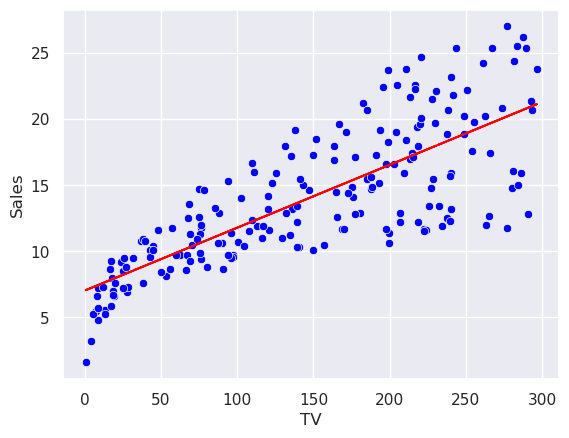

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.scatterplot(x=data['TV'], y=data['Sales'], color='blue').add_line(plt.Line2D(data['TV'], sales_pred, color='red'))

In [24]:
intercept, beta1 = lm.params.iloc[0], lm.params.iloc[1]

In [25]:
data["Sales_pred"] = beta1 * data['TV'] + intercept

In [35]:
import numpy as np
MSE = lm.mse_resid
np.sqrt(MSE)

3.2586563686504624

<Axes: ylabel='Count'>

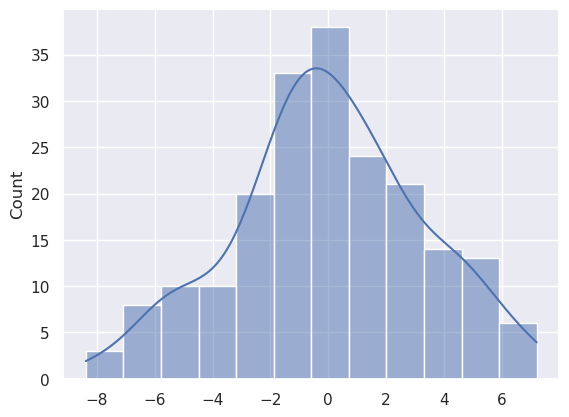

In [37]:
errors = lm.resid
sns.histplot(errors, kde=True)